In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Cargar datos
df = pd.read_csv("Mall_Customers.csv")

# Limpiar y convertir 'Genre' a numérico
df['Gender'] = df['Gender'].str.strip()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000

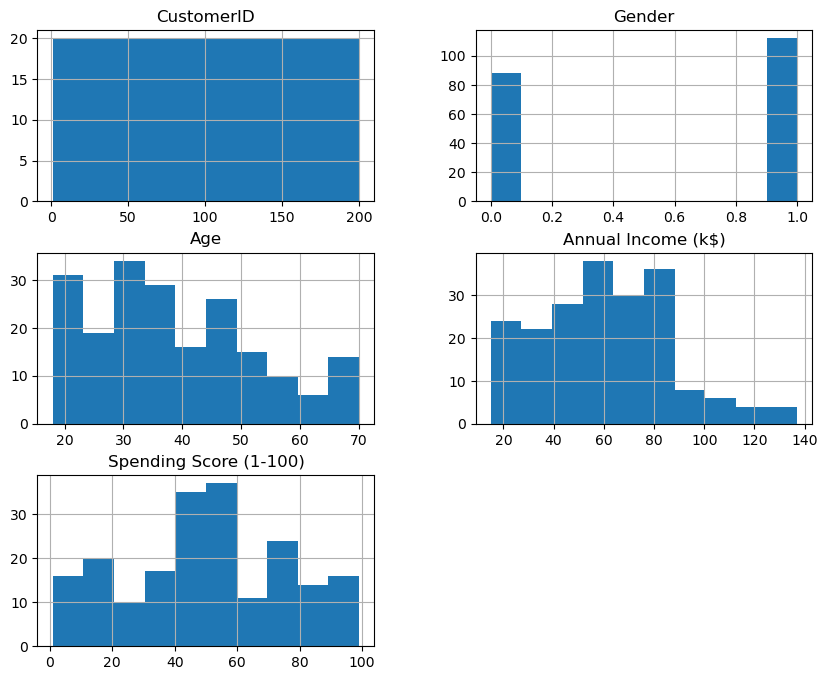

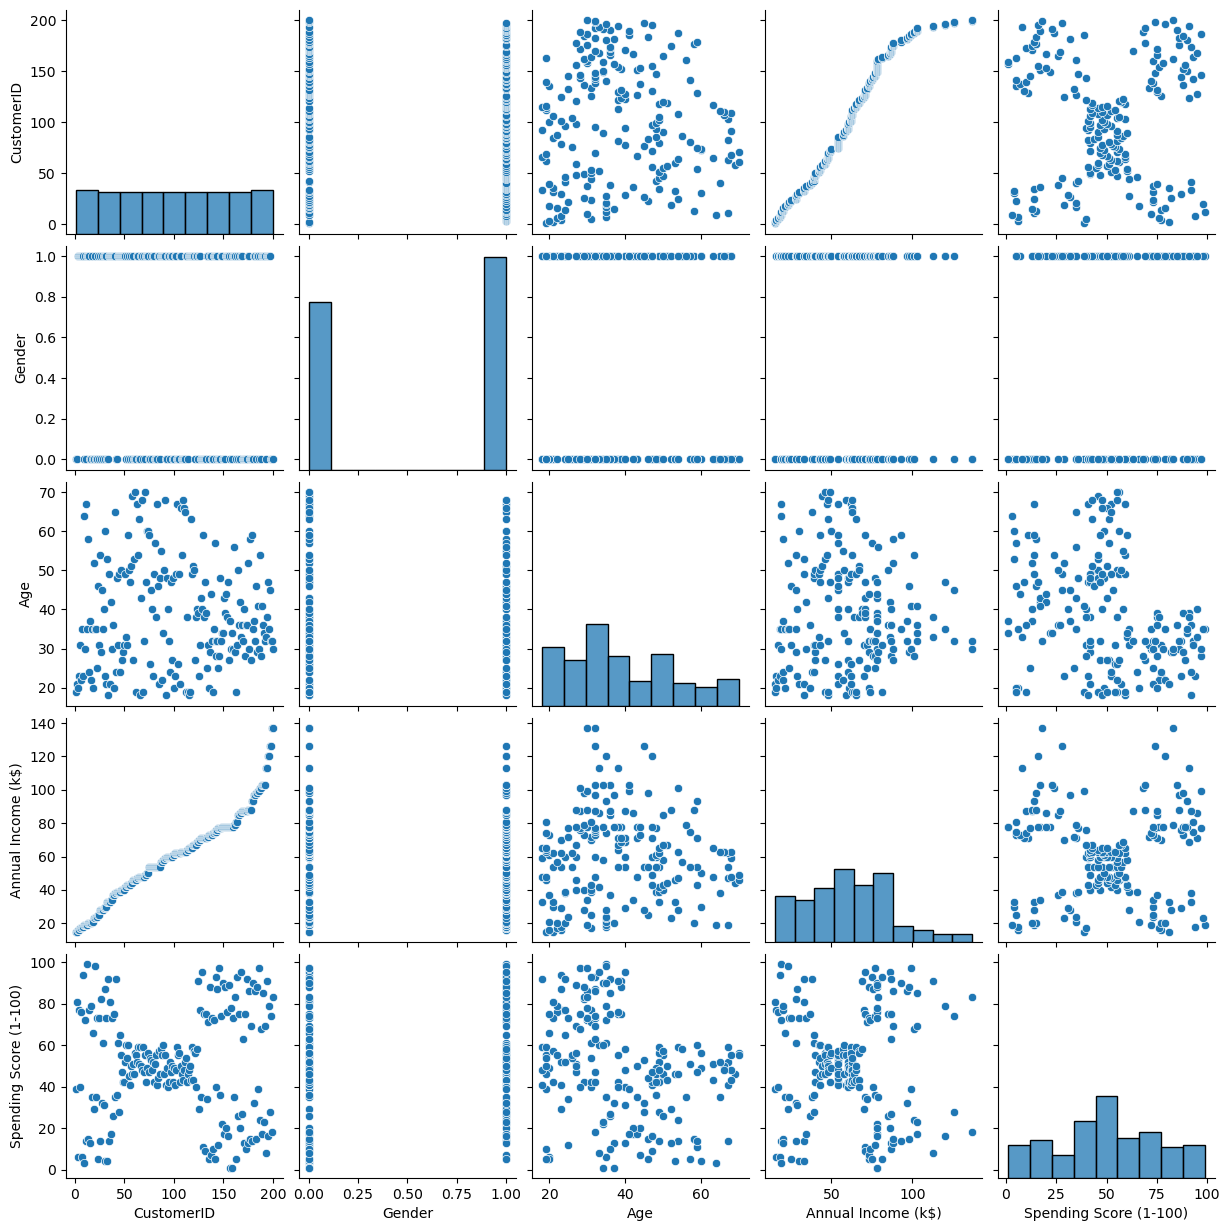

In [5]:
# EDA (Análisis Exploratorio de Datos)
print(df.info())
print(df.describe())

df.hist(figsize=(10, 8))
plt.show()

sns.pairplot(df)
plt.show()

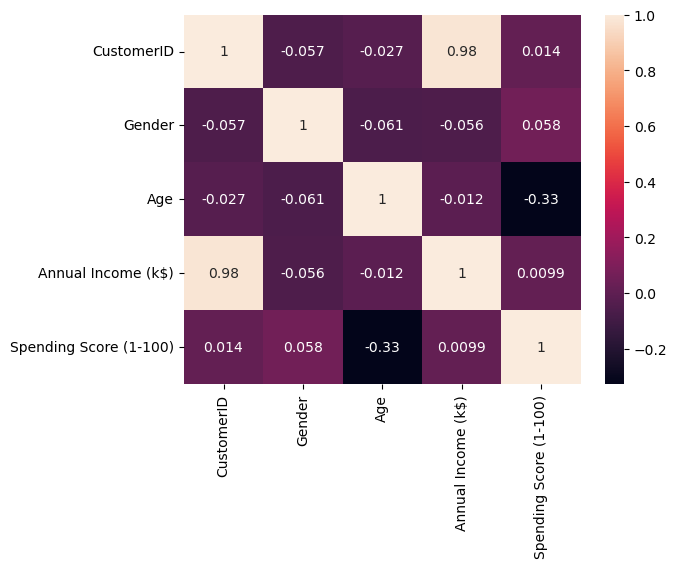

In [6]:
# Análisis de correlación (después de convertir 'Genre')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
# Preprocesamiento
df = df.drop('CustomerID', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

In [8]:
# Hierarchical Clustering
n_clusters = 5  # Puedes ajustar este valor según el dendrograma y las métricas
linkage_method = 'ward'  # Puedes probar con 'single', 'complete', 'average'

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
agg_clustering.fit(df_scaled)

labels_agg = agg_clustering.labels_

In [13]:
# Evaluación
silhouette_agg = silhouette_score(df_scaled, labels_agg)
calinski_agg = calinski_harabasz_score(df_scaled, labels_agg)
davies_agg = davies_bouldin_score(df_scaled, labels_agg)


print(f'Silhouette Score (Hierarchical): {silhouette_agg}')
print(f'Calinski-Harabasz Index (Hierarchical): {calinski_agg}')
print(f'Davies-Bouldin Index (Hierarchical): {davies_agg}')

Silhouette Score (Hierarchical): 0.28699413201651747
Calinski-Harabasz Index (Hierarchical): 64.46870730105833
Davies-Bouldin Index (Hierarchical): 1.2197730790225614


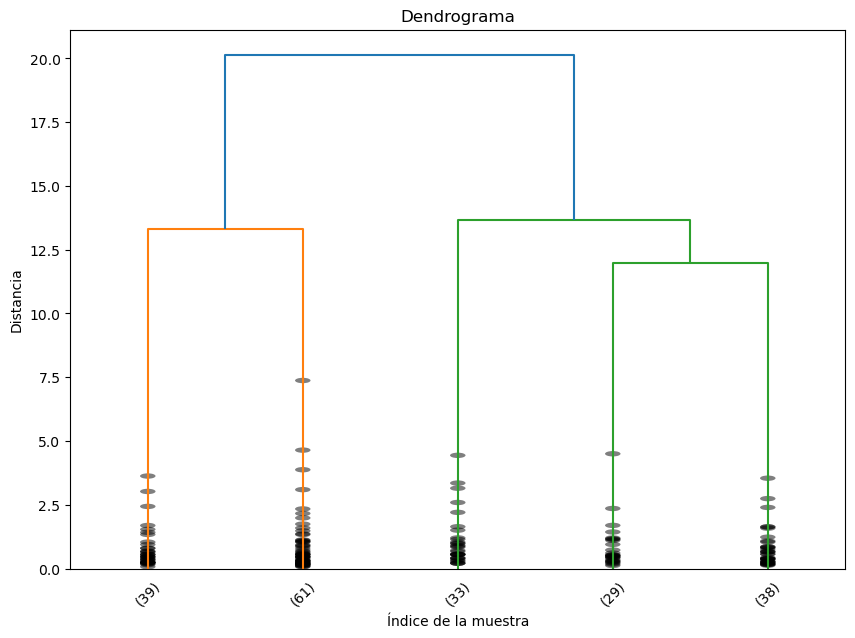

In [15]:
# Visualización: Dendrograma
plt.figure(figsize=(10, 7))  # Ajusta el tamaño de la figura si es necesario
linkage_matrix = linkage(df_scaled, method=linkage_method)
dendrogram(linkage_matrix, truncate_mode='lastp', p=n_clusters, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Dendrograma')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

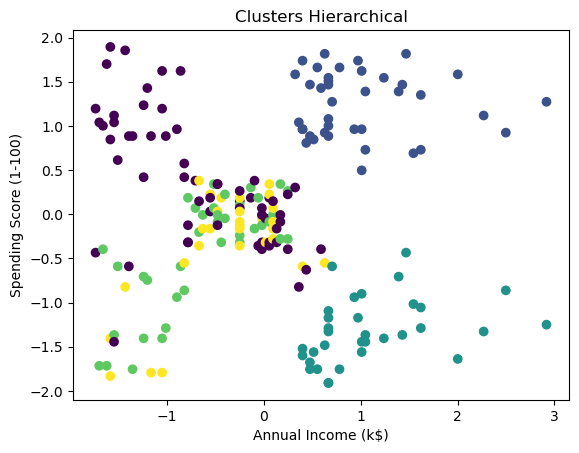

In [17]:
# Visualización: Scatter Plot
plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=labels_agg)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters Hierarchical')
plt.show()